# FIT5196 Task 3 in Assessment 2
#### Student Name: Yicheng Zhang
#### Student ID: 27699641

Date: 10/05/2018

Version: 1.0

Environment: Python 3.6.5 and Jupyter notebook

Libraries used:
* pandas (for dataframe, included in Anaconda Python 3.6) 
* re (for regular expression, included in Anaconda Python 3.6) 
* numpy (for numpy array, included in Anaconda Python 3.6)
* sys (for system information,included in Anaconda Python 3.6)
* matplotlib(for visualization, included in Anaconda Python 3.6)
* seaborn(for visualization, inherit from matplotlib)
* sklearn(Machine Learning package, need to be installed before using)

## 1.  Import libraries 

In [1]:
import sys
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
try:
    from sklearn.model_selection import train_test_split 
    from sklearn.ensemble import RandomForestRegressor 
    from sklearn import metrics
except:
    import pip
    !pip install -U scikit-learn
    from sklearn.model_selection import train_test_split 
    from sklearn.ensemble import RandomForestRegressor 
    from sklearn import metrics
%matplotlib inline

## 2. Load Data with Pandas

### 2.1. Load CSV File
First step of this assessment is loading the csv file's data from the file, In python,one of the optimized method is using the `pandas` build-in method named `read_csv()`
We can get the data with `dataframe` type.

In [2]:
dataset3 = pd.read_csv('dataset3_with_missing.csv')
dataset3.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,1999700045,20140502T000000,313000,3,1.50,1340.0,7912,1.5,0,0,3,7,1340.0,0.0,1955,0,98133,47.7658,-122.339
1,1860600135,20140502T000000,2384000,5,2.50,3650.0,9050,2.0,0,4,5,10,3370.0,280.0,1921,0,98119,47.6345,-122.367
2,5467900070,20140502T000000,342000,3,2.00,1930.0,11947,1.0,0,0,4,8,1930.0,0.0,1966,0,98042,47.3672,-122.151
3,4040800810,20140502T000000,420000,3,2.25,2000.0,8030,1.0,0,0,4,8,1000.0,1000.0,1963,0,98008,47.6188,-122.114
4,7197300105,20140502T000000,550000,4,2.50,1940.0,10500,1.0,0,0,4,7,1140.0,800.0,1976,0,98052,47.6830,-122.114


In [3]:
print (dataset3.shape)

(9967, 19)


There are total 9967 records in this dataset, and 19 columns. 

### 2.2. Check Data information
Check the information of dataframe

In [4]:
dataset3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9967 entries, 0 to 9966
Data columns (total 19 columns):
id               9967 non-null int64
date             9967 non-null object
price            9967 non-null int64
bedrooms         9967 non-null int64
bathrooms        9567 non-null float64
sqft_living      9901 non-null float64
sqft_lot         9967 non-null int64
floors           9967 non-null float64
waterfront       9967 non-null int64
view             9967 non-null int64
condition        9967 non-null int64
grade            9967 non-null int64
sqft_above       9900 non-null float64
sqft_basement    9900 non-null float64
yr_built         9967 non-null int64
yr_renovated     9967 non-null int64
zipcode          9967 non-null int64
lat              9967 non-null float64
long             9967 non-null float64
dtypes: float64(7), int64(11), object(1)
memory usage: 1.4+ MB


It can be found easily that there are some missing value in the columns `bathrooms`,`sqft_living`,`sqft_above`,and `sqft_basement` 

Using `dataframe.describe()` to get the statistic information,the `date` column we don't need to consider cause there is no missing value in thsi column.

In [5]:
dataset3.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
count,9.967000e+03,9.967000e+03,9967.000000,9567.00000,9901.000000,9.967000e+03,9967.000000,9967.000000,9967.000000,9967.000000,9967.000000,9900.000000,9900.000000,9967.000000,9967.000000,9967.000000,9967.000000,9967.000000
mean,4.582619e+09,5.292077e+05,3.360590,2.08430,2075.559135,1.475640e+04,1.480636,0.006522,0.221932,3.447677,7.667804,1788.707071,286.502626,1970.795124,88.537173,98076.508578,47.562232,-122.207991
std,2.874615e+09,3.292537e+05,0.918844,0.68647,875.594047,3.624471e+04,0.525657,0.080496,0.745250,0.670354,1.157612,803.025500,436.856021,29.212704,411.039302,53.255806,0.137256,0.142927
min,1.000102e+06,7.800000e+04,0.000000,0.00000,290.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.515000
25%,2.124069e+09,3.203000e+05,3.000000,1.75000,1440.000000,5.136500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98032.000000,47.475700,-122.324000
50%,3.905040e+09,4.500000e+05,3.000000,2.25000,1950.000000,7.725000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1570.000000,0.000000,1975.000000,0.000000,98059.000000,47.574500,-122.221000
75%,7.304301e+09,6.400000e+05,4.000000,2.50000,2550.000000,1.084150e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2240.000000,560.000000,1996.000000,0.000000,98117.000000,47.679200,-122.118000
max,9.895000e+09,7.062500e+06,33.000000,4.50000,10040.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,13.000000,7680.000000,3500.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000


**Calculated the total number of missing values for each column**



In [6]:
dataset3.isnull().sum()

id                 0
date               0
price              0
bedrooms           0
bathrooms        400
sqft_living       66
sqft_lot           0
floors             0
waterfront         0
view               0
condition          0
grade              0
sqft_above        67
sqft_basement     67
yr_built           0
yr_renovated       0
zipcode            0
lat                0
long               0
dtype: int64

there are total 400 missing value in `bathrooms`, 66 missing values in `sqft_living` 67 for `sqft_above`, 67 for `sqft_basement`

## 3.Try to fill missing values

### 3.1. Considering the relationship between columns

> **ATTRIBUTE	DESCRIPTION**
* `Id`	Sale Id
* `date`	Date of the property sold, e.g., 20140502T000000
* `price`	Property sold price
* `bedrooms`	Number of bedrooms
* `bathrooms`	Number of bathrooms, the value of which can be either an integer or a fraction ending with .25, .5, and .75. For example, 0.5 accounts for a room with a toilet but no shower
* `sqft_living`	Square footage of the property's interior living space
* `sqft_lot`	Square footage of the land space
* `floors`	Number of floors
* `waterfront`	Whether the property was overlooking the waterfront or not
* `view`	An index from 0 to 4 of how good the view of the property was
* `condition`	An index from 1 to 5 on the condition of the property.
* `sqft_above`	The square footage of the interior living space that is above ground level
* `sqft_basement`	The square footage of the interior living space that is below ground level
* `yr_built`	The year the property was initially built
* `yr_renovated`	The year of the property's last renovation
* `zipcode`	The zip code area where the property is, which contains state and zip code, separated by a space. 
* `lat`	Latitude of the property
* `long`	Longitude of the property
>>**Grade**
This column is not mentioned in the description, after observing the data, we can infer the grade will be higher when the overall quality of this property is better.


**Look at the square footage columns first.**
There are 4 types of square footage in total. From the attribute description the `sqft_above` and `sqft_basement` they are interior living space for above/below ground level. `sqft_living` should be the sum of the `sqft_above` and `sqft_basement` 

Check the null value if there is some overlap records for missing values in `sqft_living` `sqft_above` `sqft_basement`

In [7]:
dataset3[(dataset3.sqft_basement.isnull())&(dataset3.sqft_living.isnull())] #check overlappings

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long


In [8]:
dataset3[(dataset3.sqft_above.isnull())&(dataset3.sqft_basement.isnull())]#check overlappings

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long


In [9]:
dataset3[(dataset3.sqft_living.isnull())&(dataset3.sqft_basement.isnull())]#check overlappings

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long


In [10]:
dataset3[(dataset3.sqft_living.isnull())&(dataset3.sqft_above.isnull())]#check overlappings

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long


In [11]:
dataset3[(dataset3.sqft_living.isnull())&(dataset3.sqft_above.isnull())&(dataset3.sqft_basement.isnull())]#check overlappings

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long


In [12]:
dataset3[dataset3.sqft_above.isnull()].head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
146,6666830250,20140505T000000,712198,4,2.5,2450.0,4247,2.0,0,0,3,8,NaN,0.0,2013,0,98052,47.7048,-122.113
250,3888100043,20140507T000000,350000,3,1.0,1010.0,9360,1.0,0,0,3,6,NaN,0.0,1981,0,98033,47.6874,-122.168
326,8857600820,20140508T000000,260000,4,1.5,2130.0,8800,1.0,0,0,3,7,NaN,1030.0,1962,0,98032,47.3830,-122.288
338,923049378,20140508T000000,207000,3,1.0,1490.0,8995,1.0,0,0,4,7,NaN,0.0,1954,0,98168,47.4901,-122.303
393,5341600030,20140509T000000,255000,2,1.0,960.0,28717,1.0,0,0,4,6,NaN,0.0,1984,0,98070,47.3356,-122.502


In [13]:
dataset3.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,1999700045,20140502T000000,313000,3,1.50,1340.0,7912,1.5,0,0,3,7,1340.0,0.0,1955,0,98133,47.7658,-122.339
1,1860600135,20140502T000000,2384000,5,2.50,3650.0,9050,2.0,0,4,5,10,3370.0,280.0,1921,0,98119,47.6345,-122.367
2,5467900070,20140502T000000,342000,3,2.00,1930.0,11947,1.0,0,0,4,8,1930.0,0.0,1966,0,98042,47.3672,-122.151
3,4040800810,20140502T000000,420000,3,2.25,2000.0,8030,1.0,0,0,4,8,1000.0,1000.0,1963,0,98008,47.6188,-122.114
4,7197300105,20140502T000000,550000,4,2.50,1940.0,10500,1.0,0,0,4,7,1140.0,800.0,1976,0,98052,47.6830,-122.114


Check first few records, verify our assumption before. we can know that sqft_living = sqft_above + sqft_basement

**Try to fill the missing value in the sqft_above column**

In [14]:
dataset3.loc[dataset3.sqft_above.isnull(),'sqft_above'] = dataset3.loc[dataset3.sqft_above.isnull(),'sqft_living'] - \
dataset3.loc[dataset3.sqft_above.isnull(),'sqft_basement']

In [15]:
dataset3.loc[dataset3.sqft_above.isnull()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long


**Try to fill the missing value in the sqft_basement column**

In [16]:
dataset3.loc[dataset3.sqft_basement.isnull()].head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
434,1219000043,20140509T000000,315000,5,1.75,2320.0,8100,1.0,0,0,4,7,1160.0,NaN,1956,0,98166,47.4631,-122.341
503,7203101610,20140512T000000,265000,2,1.00,1290.0,2828,2.0,0,0,3,7,1290.0,NaN,2008,0,98053,47.6968,-122.025
514,3674400035,20140512T000000,156000,3,1.00,970.0,8580,1.0,0,0,3,7,970.0,NaN,1959,0,98003,47.3363,-122.311
953,8594400350,20140520T000000,315000,3,2.25,1400.0,31626,1.0,0,0,2,7,1140.0,NaN,1987,0,98092,47.3029,-122.069
956,8819900270,20140520T000000,440000,2,1.75,1300.0,4000,2.0,0,0,3,7,1300.0,NaN,1948,0,98105,47.6687,-122.288


In [17]:
dataset3.loc[dataset3.sqft_basement.isnull(),'sqft_basement'] = dataset3.loc[dataset3.sqft_basement.isnull(),'sqft_living'] - \
dataset3.loc[dataset3.sqft_basement.isnull(),'sqft_above']

In [18]:
dataset3.loc[dataset3.sqft_living.isnull()].head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
189,1223089050,20140506T000000,280000,3,1.75,NaN,11800,1.0,0,0,4,7,1630.0,0.0,1971,0,98045,47.4863,-121.730
483,2113700235,20140512T000000,360000,4,2.00,NaN,5500,1.0,0,0,5,7,1010.0,720.0,1943,0,98106,47.5304,-122.353
696,9315100030,20140515T000000,190000,3,1.00,NaN,8520,1.0,0,0,3,7,1090.0,0.0,1967,0,98003,47.3364,-122.307
701,1015500300,20140515T000000,455000,3,2.50,NaN,7344,1.0,0,0,3,8,1470.0,400.0,1980,0,98034,47.7265,-122.206
1030,8561200110,20140521T000000,512500,3,2.50,NaN,7604,2.0,0,0,3,8,1900.0,0.0,1990,0,98033,47.7002,-122.188


**Try to fill the missing value in the sqft_living column**

In [19]:
dataset3.loc[dataset3.sqft_living.isnull(),'sqft_living'] = dataset3.loc[dataset3.sqft_living.isnull(),'sqft_above'] + \
dataset3.loc[dataset3.sqft_living.isnull(),'sqft_basement']

Check the replacing result

In [20]:
dataset3.isnull().sum()

id                 0
date               0
price              0
bedrooms           0
bathrooms        400
sqft_living        0
sqft_lot           0
floors             0
waterfront         0
view               0
condition          0
grade              0
sqft_above         0
sqft_basement      0
yr_built           0
yr_renovated       0
zipcode            0
lat                0
long               0
dtype: int64

### 3.2. Try to use other method to fill missing values in bathroom column

There is no obvious relations for bathrooms and other columns, we can use a relationship heatmap to decide which columns have most significant impact on bathroom number.
- - -
`seaborn` package is one of the visualization tool in python based on the `matplotlib`. the heatmap can show the figure using gradual change colors to represent degree of numbers.

`pandas dataframe` or `numpy series` provide a very useful method named `corr()` which can decide what is the connection among columns.

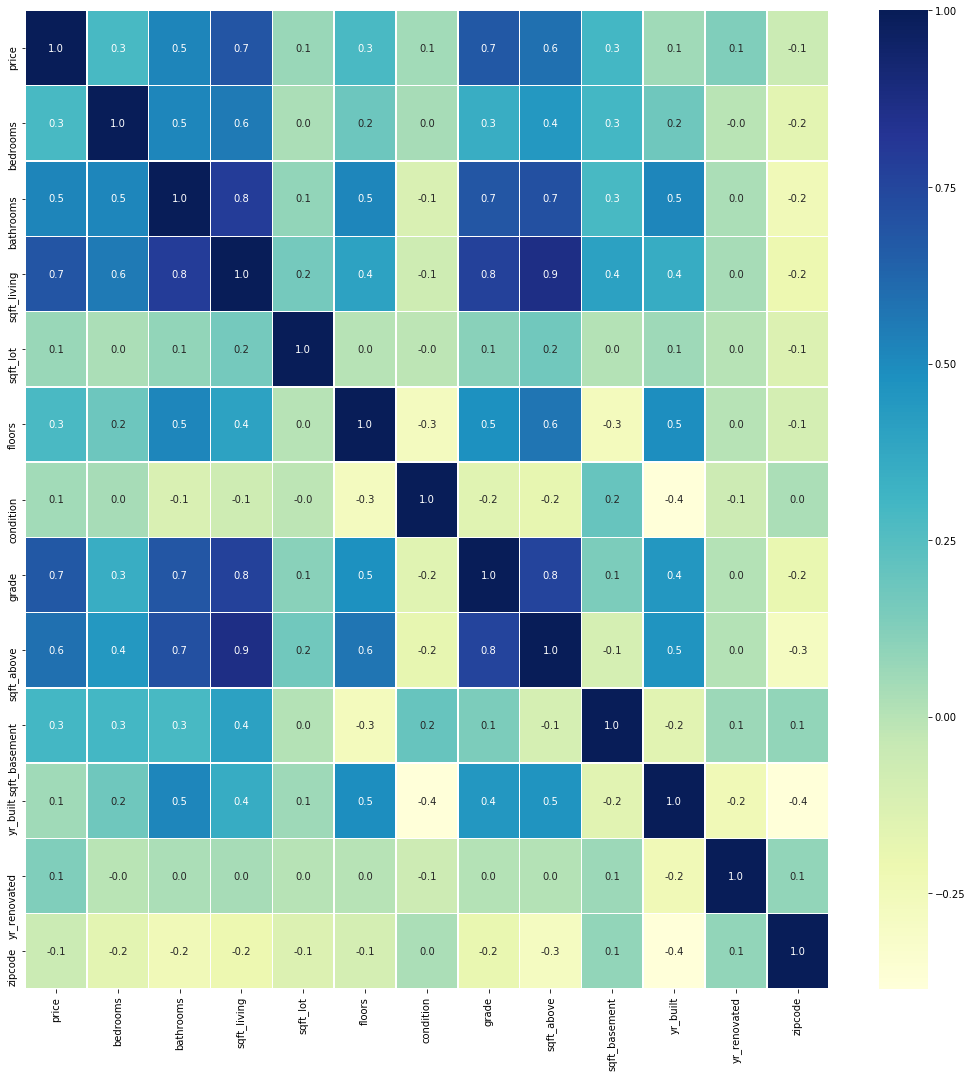

In [21]:
f,ax = plt.subplots(figsize=(18, 18))
columns = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode']
sns.heatmap(dataset3[columns].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax,cmap="YlGnBu") #correlation plot

Based on the above figure, we can find that there are few columns can cause critical influence for the bathroom number (Let’s say the correlation factor lager than 0.5). `Price`,`bedrooms` `sqft_living` `floors` `grade` `sqft_above` `yr_built`. According to the common sense, these columns are also reasonable. It is interesting that the `year of built` influence the number of bathrooms. One possible reason for that may be the people want to pursue better quality for their house nowadays. 

To know how to fill the missing values in the bathroom column, we can use the regerssion to analysis the data. The traditional linear regerssion can have the following equation:
$$y_i = \beta_01+\beta_1x_i1 + ...\epsilon_i = \sum_{i=0}^nx_i^T\beta + \epsilon_i$$
However, if the features and target is not simple linear relationship, the linear regression may be not very suitable for this.
- - -
Alternativly, we can use decsion tree regression for this task. Tranditional decision tree is simple, using the condition to switch to different branches. The `sklearn` is one of powerful maching learning package in python, we can choose one of the decision tree regressor to retrieve the value of our target `bathroom`.
- - -
After trying several methods, in this task we will use the Random forests (or random decision forests), which can get a relative optimized result.
> **Random Forest**:Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.[Wiki Link](https://en.wikipedia.org/wiki/Random_forest)

First, we should drop missing values, and split the trianing set and test set for the computer make computer can using variables to predict our target.We choose `20/80` rules to split the dataset, which means using `80%` of data in dataset for traning the machine, using `20%` for test the results.

Then we should choose the features may influence the target, from the above analyzing,we can choose those features.

In [22]:
dataset3_dropna = dataset3.dropna(axis=0,how='any')
features = ['price', 'bedrooms', 'sqft_living','sqft_lot', 'yr_built','floors','grade']
X = dataset3_dropna[features]
y = dataset3_dropna[['bathrooms']]

In [23]:
#split training set and testing set, random selection with same state for muliple running.
X_train, X_test, y_train, y_test = train_test_split(
    np.array(X),
    np.array(y),
    test_size=0.2,
    random_state=42,
)

**Create the random forest regressor model for the data set**
- - -
**Parameters setting**:

There are many parameters can be set in the machine learning model, we pick two critical parameters to modify them, and get a better result.

`max_depth`: decide when should the decsion tree stop searching

`min_samples_leaf`: decide how many branches we should create at least.

In [24]:
rf=RandomForestRegressor(max_depth=7,min_samples_leaf=7)    
rf.fit(X_train,y_train.ravel()) # transfer target value to np array.

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=7, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [25]:
y_pred = rf.predict(X_test)
for i in range(len(y_pred)):
    y_pred[i] = round(y_pred[i]*4)/4  # unify results to float with step 0.25

print ("MSE:",metrics.mean_squared_error(y_test, y_pred))
print ("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #check data error
print(metrics.r2_score(y_test, y_pred)) # predict results compare with actual results
rf.score(X_test,y_test)  # model score

MSE: 0.10517894461859979
RMSE: 0.32431303491935043
0.7810694609214645


0.7889590545957449

For the above test, we can find that this algorithm have about `79%` accuracy rate for testing dataset, and `78%` accuracy rate after change the results to the data with quarter step(`0.25`). The result for this method is acceptable and reasonable.
- - -
the MSE and RMSE show the data also have stable distribution.

In [26]:
dataset3_withna = dataset3[dataset3.bathrooms.isnull()]

**Try to caculate the result and fill the missing value in bathroom column.**

In [27]:
predict = rf.predict(dataset3_withna[features])

In [28]:
predict[0:10]

array([2.28622092, 2.20659151, 1.00194597, 2.56145854, 2.89902423,
       2.37098363, 1.38270568, 1.47530142, 1.65563538, 1.86727249])

In [29]:
for i in range(len(predict)):
    predict[i] = round(predict[i]*4)/4

In [30]:
for i, value in enumerate(predict):
    dataset3.at[dataset3_withna.index[i], 'bathrooms'] = value

**Check the distribution of the data.**

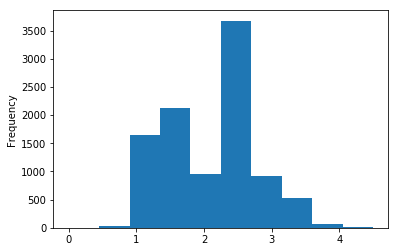

In [31]:
dataset3.bathrooms.plot(kind='hist')

**Check the dataframe after filling the missing values**

In [32]:
dataset3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9967 entries, 0 to 9966
Data columns (total 19 columns):
id               9967 non-null int64
date             9967 non-null object
price            9967 non-null int64
bedrooms         9967 non-null int64
bathrooms        9967 non-null float64
sqft_living      9967 non-null float64
sqft_lot         9967 non-null int64
floors           9967 non-null float64
waterfront       9967 non-null int64
view             9967 non-null int64
condition        9967 non-null int64
grade            9967 non-null int64
sqft_above       9967 non-null float64
sqft_basement    9967 non-null float64
yr_built         9967 non-null int64
yr_renovated     9967 non-null int64
zipcode          9967 non-null int64
lat              9967 non-null float64
long             9967 non-null float64
dtypes: float64(7), int64(11), object(1)
memory usage: 1.4+ MB


## 4. Save the data

Save the data to csv file and using the default encoding

In [33]:
dataset3.to_csv('dataset3_solution.csv',encoding='utf-8',index=False)

## 5. References

[pandas](http://pandas.pydata.org/pandas-docs/stable/tutorials.html)
- - -
[Reading Materials from moodle](https://moodle.vle.monash.edu/course/view.php?id=42906&section=10#10)
- - -
[numpy](https://docs.scipy.org/doc/numpy/user/quickstart.html)
- - -
[python doc.](https://docs.python.org/3/library/index.html)
- - -
[sklearn doc.](http://scikit-learn.org/stable/documentation.html)
- - -
[seaborn.heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap)
- - -
[Random forest](https://en.wikipedia.org/wiki/Random_forest)
- - -
[Missing data](https://en.wikipedia.org/wiki/Missing_data#Techniques_of_dealing_with_missing_data)